# Regresión Lineal: Trabajando con el Dataset Iris

En este ejercicio se explica otro ejemplo de trabajo con regresión linea pero usando nuevas librerías e importando un dataset de Iris

[Iris Dataset](https://archive.ics.uci.edu/dataset/53/iris)

[Import Iris Dataset with Seaborn](https://web.ics.purdue.edu/~yrosokha/code/Seaborn_Example_1.html)

## Enunciado del ejercicio

El ejercicio consiste en predecir el coste de un incidente de seguridad en base al número de equipos que se han visto afectados.

El conjunto de datos es generado de manera aleatoria.

### 0. Imports

In [19]:
# Instalacion de librerías externas
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn import metrics
# from sklearn.datasets import load_iris

### 1. Generación del conjunto de datos


In [21]:
# seaborn
iris = sb.load_dataset("iris")

# sklearn
# iris = load_iris()
# iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
# number of columns and names of the columns
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [23]:
# shape of the dataset
iris.shape

(150, 5)

In [24]:
# get all data
print(iris)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [25]:
#  Displaying only specific columns

# seaborn
specific_data=iris[["sepal_width","species"]]

# sklearn
# specific_data=iris[["sepal width (cm)","petal width (cm)"]]

print(specific_data.head(10))

   sepal_width species
0          3.5  setosa
1          3.0  setosa
2          3.2  setosa
3          3.1  setosa
4          3.6  setosa
5          3.9  setosa
6          3.4  setosa
7          3.4  setosa
8          2.9  setosa
9          3.1  setosa


In [26]:
# describe dataset
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 2. Visualización del conjunto de datos

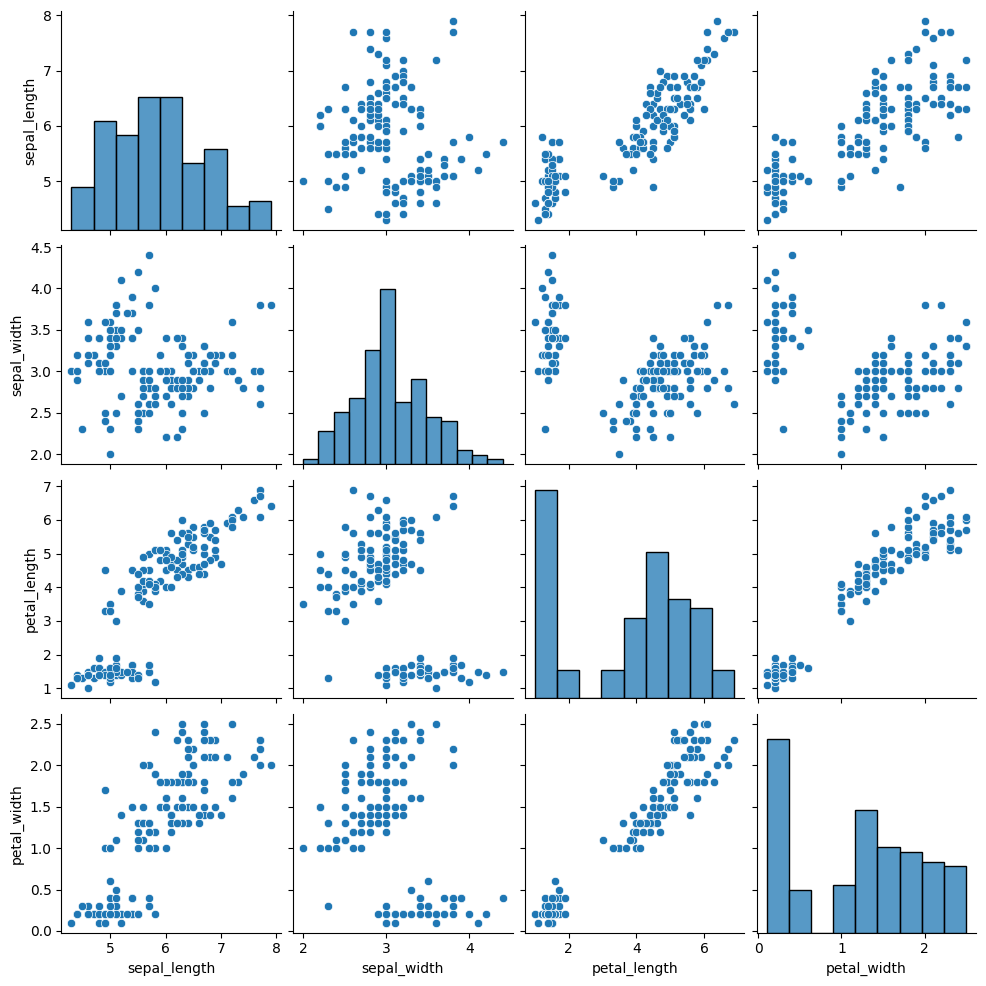

In [27]:
sb.pairplot(iris)

In [28]:
X = iris[["petal_length"]]
y = iris[["petal_width"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

### 3. Construcción del modelo

In [29]:
from sklearn.linear_model import LinearRegression

# Construcción del modelo y ajuste de la función hipótesis
lin_reg = LinearRegression()

# lin_reg.fit(df['n_equipos_afectados'].values.reshape(-1, 1), df['coste'].values)

lin_reg.fit(X_train, y_train)

LinearRegression()

In [30]:
# Parámetro theta 0
print(lin_reg.intercept_)

[-0.35489105]


In [31]:
# Parámetro theta 1
lin_reg.coef_

array([[0.41244524]])

In [32]:
y_train_pred = lin_reg.predict(X_test)

print(y_train_pred)

[[1.5836016 ]
 [0.34626586]
 [2.49098113]
 [1.50111255]
 [1.62484612]
 [0.26377682]
 [1.12991183]
 [1.74857969]
 [1.50111255]
 [1.2536454 ]
 [1.74857969]
 [0.22253229]
 [0.18128777]
 [0.26377682]
 [0.26377682]
 [1.5836016 ]
 [2.03729136]
 [1.2536454 ]
 [1.50111255]
 [1.95480232]
 [0.30502134]
 [1.66609064]
 [0.30502134]
 [1.95480232]
 [2.28475851]
 [1.78982422]
 [2.03729136]
 [2.07853589]
 [0.22253229]
 [0.30502134]
 [0.05755419]
 [0.26377682]
 [1.45986802]
 [0.30502134]
 [0.18128777]
 [1.70733517]
 [1.50111255]
 [0.26377682]
 [0.22253229]
 [0.26377682]
 [1.74857969]
 [1.50111255]
 [1.5836016 ]
 [0.18128777]
 [0.26377682]
 [1.17115635]
 [1.74857969]
 [1.91355779]
 [1.45986802]
 [2.16102494]]


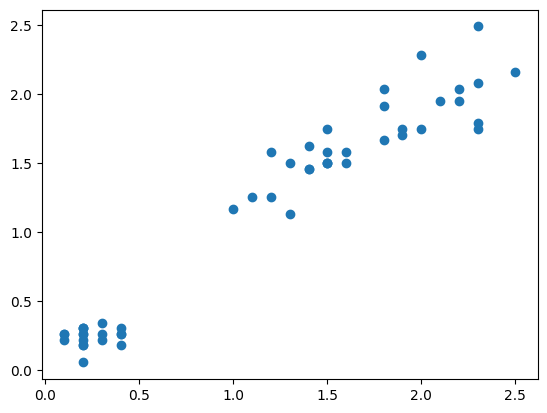

In [33]:
plt.scatter(y_test, y_train_pred)

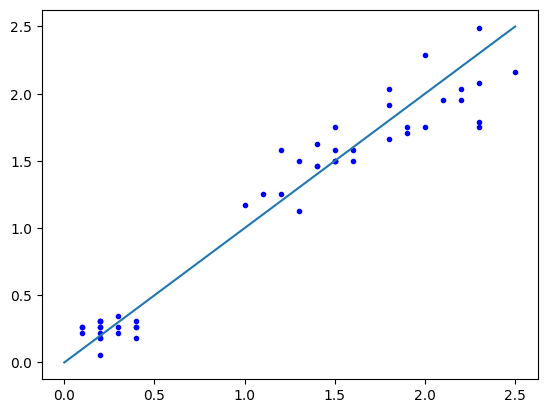

In [34]:
# Comparacion y test con y predicciones
plt.plot(y_test, y_train_pred, "b.")
plt.plot([0,2.5],[0,2.5])
plt.show()

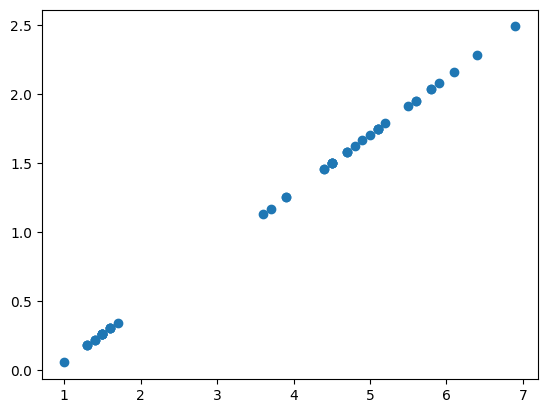

In [35]:
plt.scatter(X_test, y_train_pred)

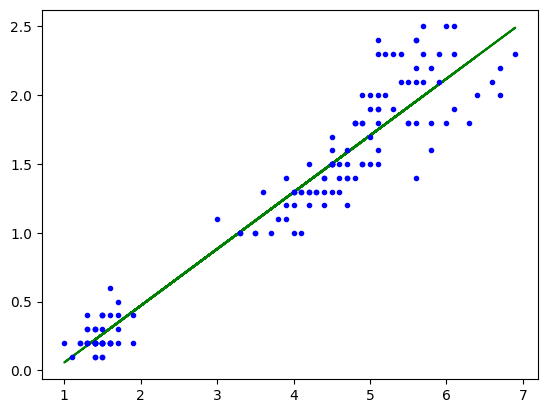

In [36]:
# Representación gráfica de la función hipótesis generada
plt.plot(X_test, y_train_pred, "g-")
plt.plot(X, y, "b.")
plt.show()

### 4. Metricas

In [37]:
print('MAE', metrics.mean_absolute_error(y_test, y_train_pred))
print('MQE', metrics.mean_squared_error(y_test, y_train_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_train_pred)))

MAE 0.1500195888670252
MQE 0.03615191408541275
RMSE 0.1901365669339087
